In [1]:
import math

class QSim:
    """Simulation of 2-D drag for a projectile."""
    mass = 100.0
    trueAirspeed = 150.0
    angleOfAttack = math.radians( 45.0 )
    diameter = 1.0
    dt = 0.1
    
    x = 0.0
    y = 0.0
    
    # compute the body velocities
    u = trueAirspeed * math.cos( angleOfAttack )
    v = trueAirspeed * math.sin( angleOfAttack )
    
    # The state equations in the form Xdot = X
    X = [u, v]
    Xdot = []
    
    time  = 0.0
    drag = 0
    g = 9.81
    Cd = 0.5
    rho = 1.225
    S = 0.25 * math.pi * diameter**2
    
    # variable to hold output data
    data = []
    
    # The force system of equations in x and y
    def uDot(self, arg):
        """The force equation in the x direction."""
        return (-self.drag*math.cos(self.angleOfAttack)/self.mass)
    def vDot(self, arg):
        """The force equation in the y direction. """
        return (-self.drag*math.sin(self.angleOfAttack)/self.mass - self.g)
    
    # Integrator for a system of first order differential equations
    def RungeKutta4(self, h, Fdot, arg):
        """A fourth order Runge-Kutta implementation for a system of 
        first order differential equations. 
        
        h - time step
        Fdot - array containing first order differential functions
        arg - array of output states
        """
        k1 = []
        arg1 = []
        for (a, f) in zip(arg, Fdot):
            k = h*f(arg)
            k1.append(k)
            arg1.append(a + 0.5*k)
        
        k2 = []
        arg2 = []
        for (a, f) in zip(arg, Fdot):
            k = h*f(arg1)
            k2.append(k)
            arg2.append(a + 0.5*k)
    
        k3 = []
        arg3 = []
        for (a, f) in zip(arg, Fdot):
            k = h*f(arg2)
            k3.append(k)
            arg3.append(a + k)

        k4 = []
        for f in Fdot:
            k4.append( h*f(arg3))
            
        result = []
        for (a, kc1, kc2, kc3, kc4) in zip(arg, k1, k2, k3, k4):
            result.append(a + (kc1 + 2.0*kc2 + 2.0*kc3 + kc4) / 6.0)

        return result
    
    def Reset(self):
        """Reset the simulation and set the state equations."""
        self.data.clear()
        self.Xdot = [self.uDot, self.vDot]
    
    def Operate(self):
        """Run a time step of the simulation."""
        # save data
        angle = math.degrees( self.angleOfAttack )
        self.data.append( ([round(self.time, 2), 
                            round(self.x, 2), 
                            round(self.y, 2), 
                            round(angle, 2),
                            round(self.X[0],2),
                            round(self.X[1],2)]) )
        
        # calculate the total drag force
        q = 0.5 * self.rho * (self.trueAirspeed)**2
        self.drag = q * self.S * self.Cd
        
        # integrate the equations
        self.X = self.RungeKutta4(self.dt, self.Xdot, self.X)
        
        # get the new position from the new u (X[0]) and v (X[1])
        self.x = self.x + self.X[0] * self.dt
        self.y = self.y + self.X[1] * self.dt
        
        # advance time
        self.time = self.time + self.dt
        
        # calculate new true airspeed 
        self.trueAirspeed = math.sqrt(self.X[0]**2 + self.X[1]**2)
        self.angleOfAttack = math.atan2(self.X[1], self.X[0])
        
    def Run(self):
        """"Run the simulation until the projectile returns to earth."""
        while self.y >= 0.0:
            self.Operate()
        print("======done=======")

In [2]:
%%time
sim = QSim()
sim.Reset()
sim.Run()

======done=======
CPU times: user 2.12 ms, sys: 702 µs, total: 2.83 ms
Wall time: 3.03 ms


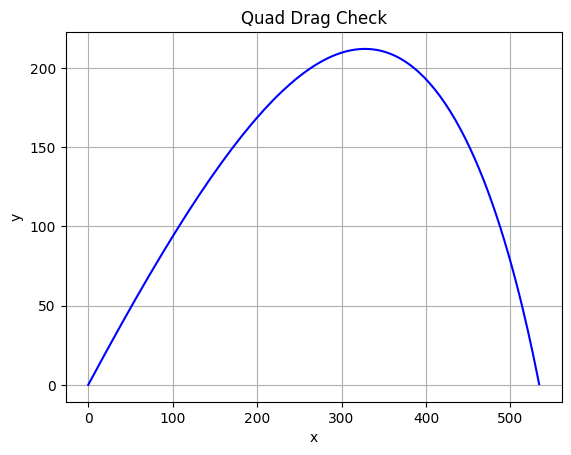

In [3]:
import matplotlib.pyplot as plt

def MakePlot(inData):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1)
    x = [ row[1] for row in inData ]
    y = [ row[2] for row in inData ]
    ax1.plot(x, y,'b')
    ax1.set(xlabel='x', ylabel='y', title='Quad Drag Check')
    ax1.grid()
    
MakePlot(sim.data)

In [4]:
sim.data

[[0.0, 0.0, 0.0, 45.0, 106.07, 106.07],
 [0.1, 10.22, 10.13, 44.72, 102.24, 101.26],
 [0.2, 20.09, 19.8, 44.43, 98.7, 96.77],
 [0.3, 29.64, 29.06, 44.13, 95.42, 92.57],
 [0.4, 38.87, 37.92, 43.82, 92.37, 88.63],
 [0.5, 47.83, 46.42, 43.49, 89.52, 84.92],
 [0.6, 56.51, 54.56, 43.15, 86.87, 81.42],
 [0.7, 64.95, 62.37, 42.79, 84.38, 78.11],
 [0.8, 73.15, 69.87, 42.42, 82.05, 74.97],
 [0.9, 81.14, 77.06, 42.03, 79.85, 71.98],
 [1.0, 88.92, 83.98, 41.63, 77.79, 69.14],
 [1.1, 96.5, 90.62, 41.22, 75.84, 66.43],
 [1.2, 103.9, 97.0, 40.78, 74.0, 63.84],
 [1.3, 111.13, 103.14, 40.33, 72.26, 61.35],
 [1.4, 118.19, 109.04, 39.87, 70.61, 58.97],
 [1.5, 125.09, 114.71, 39.38, 69.05, 56.69],
 [1.6, 131.85, 120.16, 38.88, 67.57, 54.49],
 [1.7, 138.47, 125.39, 38.37, 66.16, 52.37],
 [1.8, 144.95, 130.43, 37.83, 64.81, 50.33],
 [1.9, 151.3, 135.26, 37.27, 63.53, 48.35],
 [2.0, 157.53, 139.9, 36.7, 62.31, 46.44],
 [2.1, 163.65, 144.36, 36.1, 61.15, 44.59],
 [2.2, 169.65, 148.64, 35.49, 60.04, 42.8],
 [